In [1]:
import pandas as pd

In [2]:
cal = pd.read_csv('calories.csv')
exe = pd.read_csv('exercise.csv')

In [3]:
df = pd.merge(exe,cal, on='User_ID')

In [4]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [6]:
df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [7]:
#Evenly distributed

In [8]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
import matplotlib.pyplot as plt

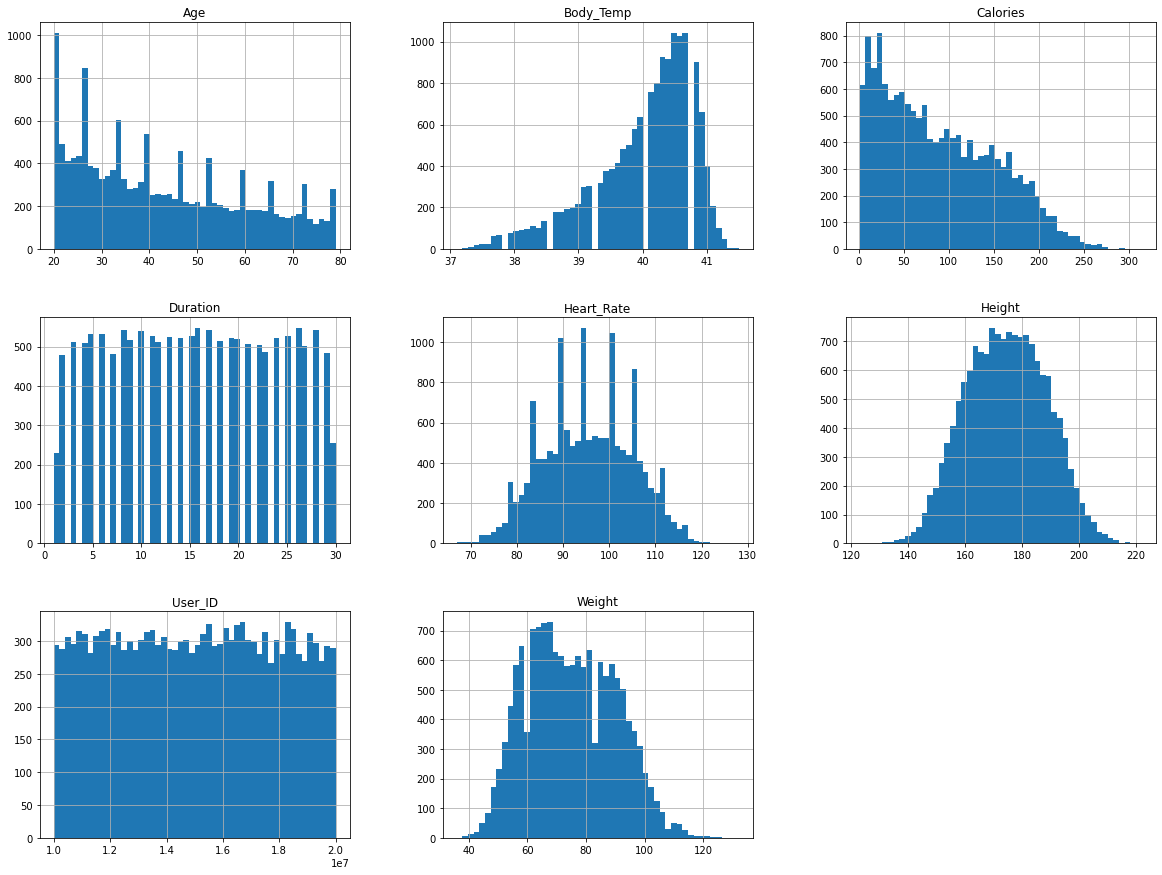

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
df = df[df['Calories']<250]

In [12]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.492600e+04,14926.000000,14926.00000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000
mean,1.497799e+07,42.675801,174.39736,74.880879,15.464893,95.427777,40.021285,88.678079
std,2.872361e+06,16.926868,14.24376,15.006090,8.286847,9.514998,0.778766,61.392377
min,1.000116e+07,20.000000,123.00000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247669e+07,28.000000,164.00000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,174.00000,74.000000,15.000000,95.000000,40.200000,78.000000
75%,1.744781e+07,56.000000,185.00000,86.000000,23.000000,103.000000,40.600000,137.000000
max,1.999965e+07,79.000000,222.00000,132.000000,30.000000,125.000000,41.500000,249.000000


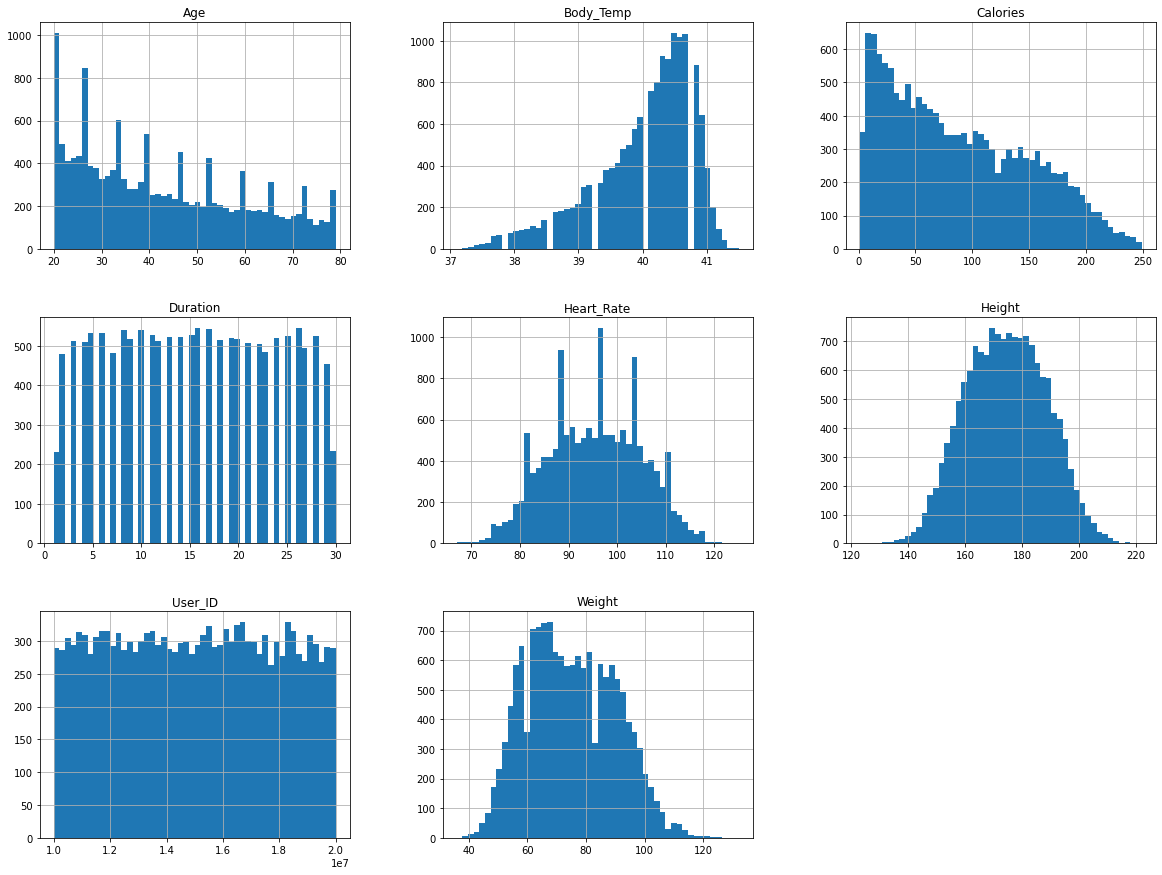

In [13]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
df['calorie_cat'] = pd.cut(df['Calories'], bins=[0,50,100,150,200,251], labels=[1,2,3,4,5])

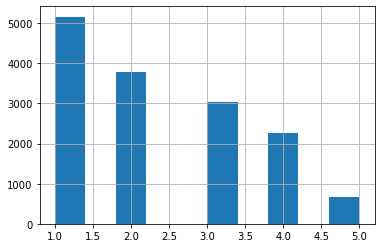

In [15]:
df['calorie_cat'].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(df,df['calorie_cat']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [18]:
strat_test_set

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,calorie_cat
4108,10187691,female,62,156.0,63.0,13.0,86.0,40.4,59.0,2
14287,13950642,male,24,193.0,90.0,29.0,104.0,40.9,163.0,4
7989,18752620,female,30,159.0,56.0,13.0,98.0,40.0,70.0,2
2488,19101362,male,38,182.0,83.0,5.0,83.0,39.1,15.0,1
4684,18010312,female,37,154.0,55.0,6.0,92.0,39.1,29.0,1
...,...,...,...,...,...,...,...,...,...,...
4282,13840094,male,25,176.0,74.0,19.0,107.0,40.5,110.0,3
14538,18536110,female,28,183.0,78.0,17.0,107.0,40.1,102.0,3
5453,12024446,male,28,199.0,94.0,11.0,94.0,39.9,48.0,1
247,13172849,male,20,183.0,81.0,17.0,97.0,40.5,71.0,2


In [19]:
strat_test_set.drop('calorie_cat',axis=1,inplace=True)
strat_train_set.drop('calorie_cat',axis=1,inplace=True)

E:\installations\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
strat_test_set

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
4108,10187691,female,62,156.0,63.0,13.0,86.0,40.4,59.0
14287,13950642,male,24,193.0,90.0,29.0,104.0,40.9,163.0
7989,18752620,female,30,159.0,56.0,13.0,98.0,40.0,70.0
2488,19101362,male,38,182.0,83.0,5.0,83.0,39.1,15.0
4684,18010312,female,37,154.0,55.0,6.0,92.0,39.1,29.0
...,...,...,...,...,...,...,...,...,...
4282,13840094,male,25,176.0,74.0,19.0,107.0,40.5,110.0
14538,18536110,female,28,183.0,78.0,17.0,107.0,40.1,102.0
5453,12024446,male,28,199.0,94.0,11.0,94.0,39.9,48.0
247,13172849,male,20,183.0,81.0,17.0,97.0,40.5,71.0


In [21]:
df = strat_train_set.copy()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

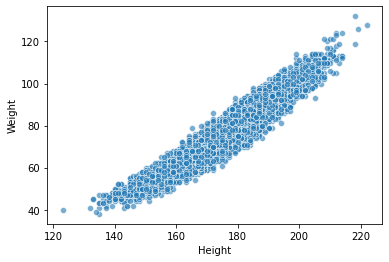

In [23]:
sns.scatterplot(data=df,x='Height',y='Weight',alpha=0.6)

In [24]:
df.corr()['Calories']

User_ID       0.001709
Age           0.137347
Height        0.007559
Weight        0.020739
Duration      0.958160
Heart_Rate    0.897496
Body_Temp     0.827164
Calories      1.000000
Name: Calories, dtype: float64

In [25]:
df = pd.get_dummies(df,drop_first=True)

In [26]:
df.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_male
3783,12948429,40,145.0,49.0,1.0,87.0,38.0,4.0,0
5291,19529497,53,164.0,69.0,12.0,94.0,39.9,62.0,0
3263,11773824,39,180.0,77.0,19.0,105.0,40.3,114.0,0
3370,10370812,45,191.0,99.0,14.0,96.0,40.0,79.0,1
6751,15762806,73,190.0,99.0,5.0,85.0,38.9,27.0,1


In [27]:
df_labels = df['Calories'].copy()

In [28]:
df_labels.head()

3783      4.0
5291     62.0
3263    114.0
3370     79.0
6751     27.0
Name: Calories, dtype: float64

In [29]:
df = df.drop('Calories',axis=1)

In [30]:
df.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
3783,12948429,40,145.0,49.0,1.0,87.0,38.0,0
5291,19529497,53,164.0,69.0,12.0,94.0,39.9,0
3263,11773824,39,180.0,77.0,19.0,105.0,40.3,0
3370,10370812,45,191.0,99.0,14.0,96.0,40.0,1
6751,15762806,73,190.0,99.0,5.0,85.0,38.9,1


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mms = MinMaxScaler()

In [33]:
mms.fit(df)

MinMaxScaler()

In [34]:
df = mms.transform(df)

In [35]:
df

array([[0.29478307, 0.33898305, 0.22222222, ..., 0.34482759, 0.20454545,
        0.        ],
       [0.95301506, 0.55932203, 0.41414141, ..., 0.46551724, 0.63636364,
        0.        ],
       [0.17730022, 0.3220339 , 0.57575758, ..., 0.65517241, 0.72727273,
        0.        ],
       ...,
       [0.36310856, 0.        , 0.49494949, ..., 0.65517241, 0.79545455,
        0.        ],
       [0.1067422 , 0.03389831, 0.64646465, ..., 0.39655172, 0.59090909,
        1.        ],
       [0.71581065, 0.15254237, 0.6969697 , ..., 0.44827586, 0.70454545,
        1.        ]])

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(df,df_labels)

LinearRegression()

In [53]:
some_data = df[:5]
some_labels = df_labels[:5]

In [43]:
lin_reg.predict(some_data)

array([  7.39775153,  70.91883889, 124.38770063,  84.20477863,
        35.57044144])

In [55]:
some_labels.values

array([  4.,  62., 114.,  79.,  27.])

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
lin_pred = lin_reg.predict(df)

In [59]:
import numpy as np

In [60]:
np.sqrt(mean_squared_error(lin_pred,df_labels))

10.713562857219692

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df,df_labels)

DecisionTreeRegressor()

In [63]:
tree_pred = tree_reg.predict(df)

In [64]:
np.sqrt(mean_squared_error(tree_pred,df_labels))

0.0

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
scores = cross_val_score(tree_reg, df, df_labels, scoring="neg_mean_squared_error", cv=10)

In [67]:
tree_rmse_scores = np.sqrt(-scores)

In [68]:
tree_rmse_scores

array([6.19932085, 5.70830001, 5.74289659, 6.5036611 , 5.87729391,
       5.89988241, 5.88477884, 5.5189972 , 5.69524572, 5.93136026])

In [69]:
lin_scores = cross_val_score(lin_reg, df, df_labels, scoring="neg_mean_squared_error", cv=10)

In [71]:
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([10.74510974, 10.14182948, 10.49445297, 11.01165477, 10.65234452,
       11.22216203, 10.31402062, 11.00506891, 10.96508259, 10.65085039])

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
forest_reg = RandomForestRegressor()
forest_reg.fit(df, df_labels)

RandomForestRegressor()

In [74]:
forest_pred = forest_reg.predict(df)

In [75]:
np.sqrt(mean_squared_error(forest_pred,df_labels))

1.1640510326706308

In [76]:
forest_scores = cross_val_score(forest_reg, df, df_labels, scoring="neg_mean_squared_error", cv=10)

In [77]:
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([3.17702547, 3.06494325, 2.96746543, 3.24077261, 2.94191555,
       3.3139816 , 3.18611569, 3.24834966, 3.27371497, 2.91124258])

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

In [80]:
forest_reg = RandomForestRegressor()

In [81]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)

In [82]:
grid_search.fit(df, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [83]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [84]:
final_model = grid_search.best_estimator_

In [85]:
final_model

RandomForestRegressor(max_features=6, n_estimators=30)

In [91]:
X_test = strat_test_set.drop('Calories',axis=1)
y_test = strat_test_set['Calories'].copy()

In [92]:
X_test = pd.get_dummies(X_test,drop_first=True)

In [93]:
X_test_prepared = mms.transform(X_test)

In [94]:
final_pred = final_model.predict(X_test_prepared)

In [95]:
final_mse = mean_squared_error(y_test, final_pred)

In [96]:
final_rmse = np.sqrt(final_mse)

In [97]:
final_rmse

3.244776534764419

In [99]:
from scipy import stats

In [100]:
confidence = 0.95
squared_errors = (final_pred - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([3.0604339 , 3.41919491])